<a href="https://colab.research.google.com/github/arghac14/Soccer-result-predictor/blob/master/SoccerPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import io
from google.colab import files
uploaded=files.upload()

Saving soccer_international_history_dataset.csv to soccer_international_history_dataset (1).csv


In [0]:
df=pd.read_csv(io.BytesIO(uploaded['soccer_international_history_dataset.csv']))
df.head()
df=df.head(2500)

In [46]:
# Getting dummy datas

homeCountry=pd.get_dummies(df.home_country)
awayCountry=pd.get_dummies(df.away_country)
homeScore=pd.get_dummies(df.home_score)
awayScore=pd.get_dummies(df.away_score)
matchType=pd.get_dummies(df.match_type)
matchCountry=pd.get_dummies(df.match_type)


result=df.home_team_result.replace(to_replace ="Win", 
                 value =1) 
result=result.replace(to_replace ="Loss", 
                 value =0) 
result=result.replace(to_replace ="Draw", 
                 value =2) 

df=pd.concat([homeCountry, awayCountry, homeScore, awayScore, matchType, matchCountry, result ], axis=1)
df.head()

,Afghanistan,Argentina,Aruba,Australia,Austria,Barbados,Belarus,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,China,Colombia,Costa Rica,Croatia,Cuba,Curaçao,Czechoslovakia,Denmark,Dominica,Ecuador,Egypt,El Salvador,England,Estonia,Finland,France,French Guyana,Germany,Greece,Guadeloupe,Guatemala,Guyana,Haiti,Honduras,Hungary,India,Ireland,...,10,11,12,13,15,Balkan Cup,Baltic Cup,British Championship,CCCF Championship,Copa América,Copa Chevallier Boutell,Copa Lipton,Copa Newton,Copa Premio Honor Argentino,Copa Premio Honor Uruguayo,Copa Rio Branco,Copa Roca,FIFA World Cup,FIFA World Cup qualification,Friendly,International Cup,Nordic Championship,Balkan Cup,Baltic Cup,British Championship,CCCF Championship,Copa América,Copa Chevallier Boutell,Copa Lipton,Copa Newton,Copa Premio Honor Argentino,Copa Premio Honor Uruguayo,Copa Rio Branco,Copa Roca,FIFA World Cup,FIFA World Cup qualification,Friendly,International Cup,Nordic Championship,home_team_result
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### Applying classifier models

In [47]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x=df.drop('home_team_result' , axis=1)
y=df['home_team_result']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=6)

reg=LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

lr_accuracy=round(accuracy_score(y_test,y_pred)*100,2)
print('\nAccuracy(Logistic Regression): ',lr_accuracy,'%\n')


Accuracy(Logistic Regression):  89.7 %



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [48]:
# K-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=1)

knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

knn_accuracy=round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(K-nearest Neighbors): ',knn_accuracy,'%')

Accuracy(K-nearest Neighbors):  90.3 %


In [49]:
#  Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

nb_accuracy=round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Naive Bayes): ',nb_accuracy,'%')


Accuracy(Naive Bayes):  31.6 %


In [50]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

clf_entropy=DecisionTreeClassifier(criterion='entropy', random_state=2)
clf_entropy.fit(x_train,y_train)
clf_entropy.predict(x_test)

dt_accuracy=round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Decision Tree): ',dt_accuracy,'%')

Accuracy(Decision Tree):  31.6 %


In [51]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

rf_accuracy=round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Random Forest): ',rf_accuracy,'%')

Accuracy(Random Forest):  99.9 %


In [52]:
# Support Vector Machine

from sklearn import svm

clf=svm.SVC(kernel="linear", C=1000)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

svm_accuracy=round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(SVM): ',svm_accuracy,'%')

Accuracy(SVM):  99.7 %


### Voting Classifier ( Ensemble learning):

In [53]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
nb_clf=GaussianNB()
dt_clf=DecisionTreeClassifier(criterion='entropy', random_state=100)
knn_clf=KNeighborsClassifier(n_neighbors=25)

voting_clf = VotingClassifier(
	estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf),('nb',nb_clf),('dt',dt_clf),('knn',knn_clf)],
	voting = 'hard')
voting_clf.fit(x_train, y_train)
y_pred=voting_clf.predict(x_test)

vot_accuracy=round(accuracy_score(y_test,y_pred)*100,2)
print('\n\nAccuracy(Voting Classifier): ',vot_accuracy,'%')



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)




Accuracy(Voting Classifier):  98.1 %


## Result:

In [54]:
print('-----------Accuracy of prediction--------------')
print('\nLogistic Regression : ',lr_accuracy,'%')
print('\nK-nearest Neighbors : ',knn_accuracy,'%')
print('\nNaive Bayes : ',nb_accuracy,'%')
print('\nDecision Tree : ',dt_accuracy,'%')
print('\nRandom Forest : ',rf_accuracy,'%')
print('\nSupport Vector Machine : ',svm_accuracy,'%')
print('\n\nFinal Accuracy-')
print('\nVoting Classifier: ',vot_accuracy,'%')

-----------Accuracy of prediction--------------

Logistic Regression :  89.7 %

K-nearest Neighbors :  90.3 %

Naive Bayes :  31.6 %

Decision Tree :  31.6 %

Random Forest :  99.9 %

Support Vector Machine :  99.7 %


Final Accuracy-

Voting Classifier:  98.1 %


## Result of Prediction

In [61]:
res=['LOSE','WIN','DRAW']
print('\nActual results:\n')
res1=[]
for i in y_test:
  res1.append(res[i])
print(res1)

print('\nPredicted results:\n')
res2=[]
for i in y_pred:
  res2.append(res[i])
print(res2)


Actual results:

['LOSE', 'WIN', 'WIN', 'LOSE', 'WIN', 'LOSE', 'LOSE', 'WIN', 'DRAW', 'LOSE', 'WIN', 'WIN', 'WIN', 'WIN', 'WIN', 'DRAW', 'WIN', 'LOSE', 'WIN', 'WIN', 'DRAW', 'DRAW', 'WIN', 'WIN', 'DRAW', 'WIN', 'WIN', 'LOSE', 'LOSE', 'LOSE', 'WIN', 'WIN', 'WIN', 'WIN', 'WIN', 'DRAW', 'WIN', 'WIN', 'WIN', 'WIN', 'WIN', 'WIN', 'DRAW', 'LOSE', 'WIN', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'WIN', 'WIN', 'WIN', 'WIN', 'DRAW', 'LOSE', 'LOSE', 'DRAW', 'WIN', 'WIN', 'WIN', 'WIN', 'LOSE', 'LOSE', 'WIN', 'LOSE', 'WIN', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'WIN', 'DRAW', 'DRAW', 'DRAW', 'DRAW', 'WIN', 'LOSE', 'LOSE', 'WIN', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'DRAW', 'WIN', 'DRAW', 'WIN', 'WIN', 'LOSE', 'WIN', 'LOSE', 'LOSE', 'WIN', 'LOSE', 'DRAW', 'WIN', 'WIN', 'DRAW', 'WIN', 'WIN', 'LOSE', 'DRAW', 'WIN', 'WIN', 'WIN', 'WIN', 'WIN', 'LOSE', 'WIN', 'WIN', 'DRAW', 'LOSE', 'WIN', 'DRAW', 'LOSE', 'DRAW', 'DRAW', 'WIN', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'LOSE', 'WIN', 'WIN', 'DRAW', 'W

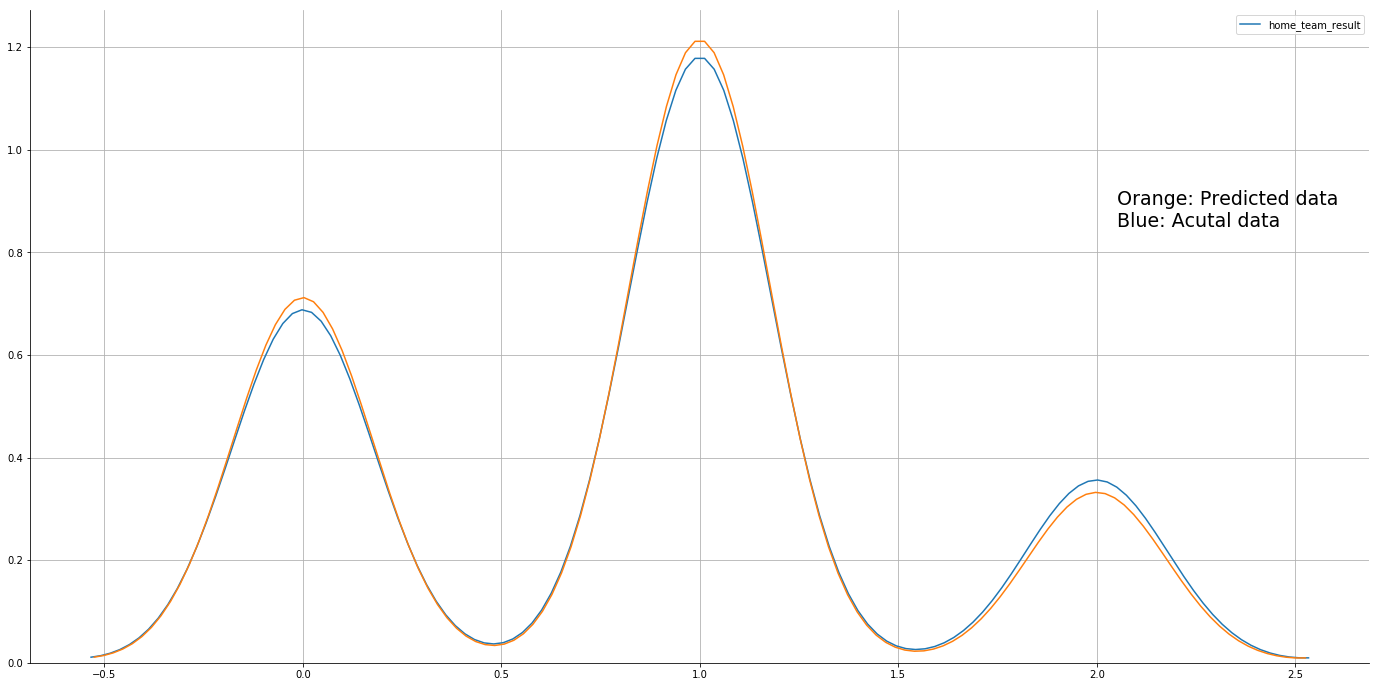

In [95]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(24,12))
sb.kdeplot(y_test)
sb.kdeplot(y_pred)
sb.despine()
plt.text(2.05, 0.85,'Orange: Predicted data\nBlue: Acutal data', fontsize=19)
plt.grid()
plt.show()